## Pinnacle Summer Project Final Outputs

## Using Machine Learning and Portfolio Optimization to Navigate Volatility Regimes

###  By Gregory Giordano and Vincent Cortese

<p>&nbsp;</p><p>&nbsp;</p>



## The Portfolio:
   ### *- SPXL: Direxion Daily S&P500 Bull 3X Shares (Market Returns)*
   - **SPXL** : Provides market exposure for the portfolio. Able to use leveraged ETF to emphasize returns because of the optimal weighting 
   ### *- PNQI: Invesco NASDAQ Internet ETF (Alpha Returns)*
   - **PNQI** : Provides portfolio with option to get more exposure to specific sector 
   ### *- GLD: SPDR Gold Shares (Vol Hedge)*
   - **GLD** : Provides portfolio with hedge against market volatility 

In [11]:
from Code.Trading_Strats.portfolioClass import returns_matrix
import matplotlib.pyplot as plt

In [5]:
from Code.main import main
v_trial = main.Vol_Outputs(end_date="2020-06-20")

2919
2922


                 Optimized_Port  Equal_Weight
Metric (Annual)                              
Return                 0.137161      0.160075
Volatiltiy             0.148773      0.268366
                 Optimized_Port       SPY
Metric (Annual)                          
Return                 0.137161  0.060705
Volatiltiy             0.148773  0.211584


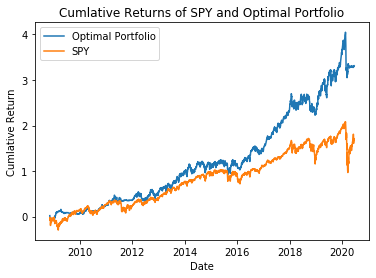

In [17]:
equal_compare = v_trial.compare_equal()
spy_compare = v_trial.compare_spy()
print(equal_compare)
print(spy_compare)

optimal_returns = v_trial.opt_daily.dropna()
spy_returns = returns_matrix(['SPY'], start_date="2008-11-09", end_date="2020-06-20")
cum_optimal_returns, cum_spy_returns = ((optimal_returns+1).cumprod()-1),((spy_returns+1).cumprod()-1)
plt.plot(cum_optimal_returns, label = "Optimal Portfolio")
plt.plot(cum_spy_returns, label = "SPY")
plt.legend()
plt.title("Cumlative Returns of SPY and Optimal Portfolio")
plt.xlabel("Date")
plt.ylabel("Cumlative Return")
plt.show()

In [19]:
v_trial.analyze_volatile_periods()

{0:                                  Optimized_Port  Equal_Weight_Port       SPY
 Metrics 2009-01-26 - 2009-03-26                                             
 Return                                 0.508791           0.330827  0.000000
 Volatilty                              0.112220           0.447222  0.417252
 VaR                                   -0.184586          -0.735615 -0.686319,
 1:                                  Optimized_Port  Equal_Weight_Port       SPY
 Metrics 2010-05-26 - 2010-07-26                                             
 Return                                 0.051690           0.234609  0.204596
 Volatilty                              0.037294           0.333912  0.245622
 VaR                                   -0.061343          -0.549236 -0.404013,
 2:                                  Optimized_Port  Equal_Weight_Port       SPY
 Metrics 2011-07-26 - 2011-09-26                                             
 Return                                -0.125153     

## Optimization Technique

- To optimize the portfolio, when our algorithm predicted a high vol regime the following week (vix > 20), we looked back on the past two weeks of data and used scipy to minimize portfolio volatility. The minimization method is Nelder-Mead which is a direct search method that can find the minimum of functions without defined derivatives. 